<a href="https://colab.research.google.com/github/nuzhatfaizah321/Projects/blob/main/MIS444_Faizah_Nuzhat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV

In [53]:
# Load the uploaded dataset
data = pd.read_csv('Car_Price_Prediction.csv')

# Check the first few rows
data.head()


,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657


In [54]:
# Display the first few rows of the dataset to understand its structure
data.head()

,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
0,Honda,Model B,2015,3.9,74176,Petrol,Manual,30246.207931
1,Ford,Model C,2014,1.7,94799,Electric,Automatic,22785.747684
2,BMW,Model B,2006,4.1,98385,Electric,Manual,25760.290347
3,Honda,Model B,2015,2.6,88919,Electric,Automatic,25638.003491
4,Honda,Model C,2004,3.4,138482,Petrol,Automatic,21021.386657


In [55]:
data.shape

(1000, 8)

In [56]:
# Check Null Values
data.isnull().values.any()

np.False_

In [57]:
print("There is {} missing values in data frame".format(data.isnull().sum().sum()))

There is 0 missing values in data frame


In [58]:
len(data.columns)

8

In [59]:
data.describe()

,Year,Engine Size,Mileage,Price
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,2010.688000,2.798300,97192.48700,25136.615530
std,6.288577,1.024137,59447.31576,5181.401368
min,2000.000000,1.000000,56.00000,6704.953524
25%,2005.000000,1.900000,44768.75000,21587.878370
50%,2011.000000,2.800000,94411.50000,25189.325247
75%,2016.000000,3.700000,148977.75000,28806.368974
max,2021.000000,4.500000,199867.00000,41780.504635


Exploratory Data Analysis (EDA) check for missing values, outliers, distributions, and correlations.

In [60]:
# Define columns to plot: exclude categorical columns
numerical_columns = ['Year', 'Engine Size', 'Mileage', 'Price']

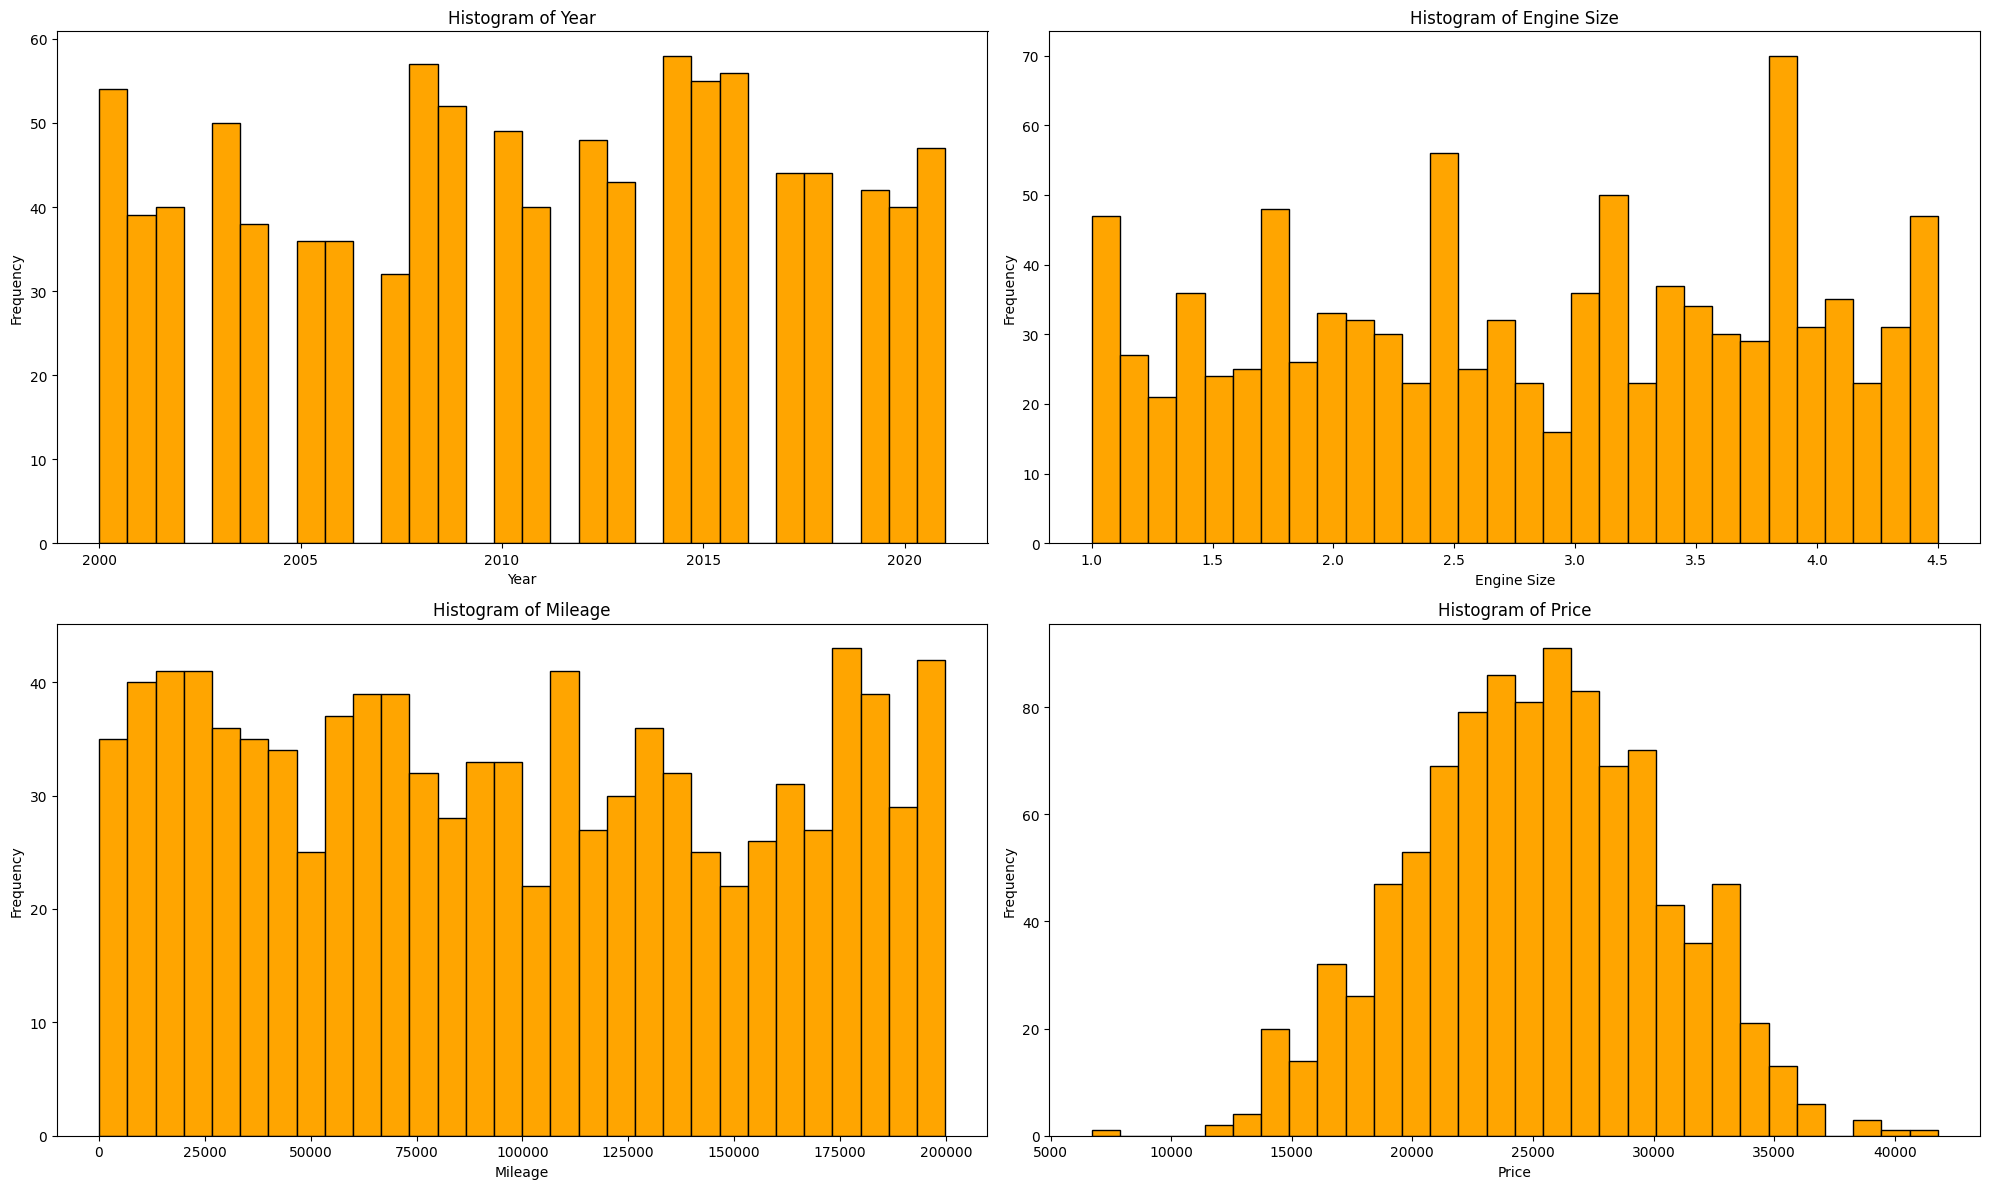

In [61]:
# Create a 2x2 grid for the plots
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

# Loop through the numerical columns and plot the histograms and column charts
for i, column in enumerate(numerical_columns):
    # Plot histogram
    axes[i].hist(data[column], bins=30, color='orange', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

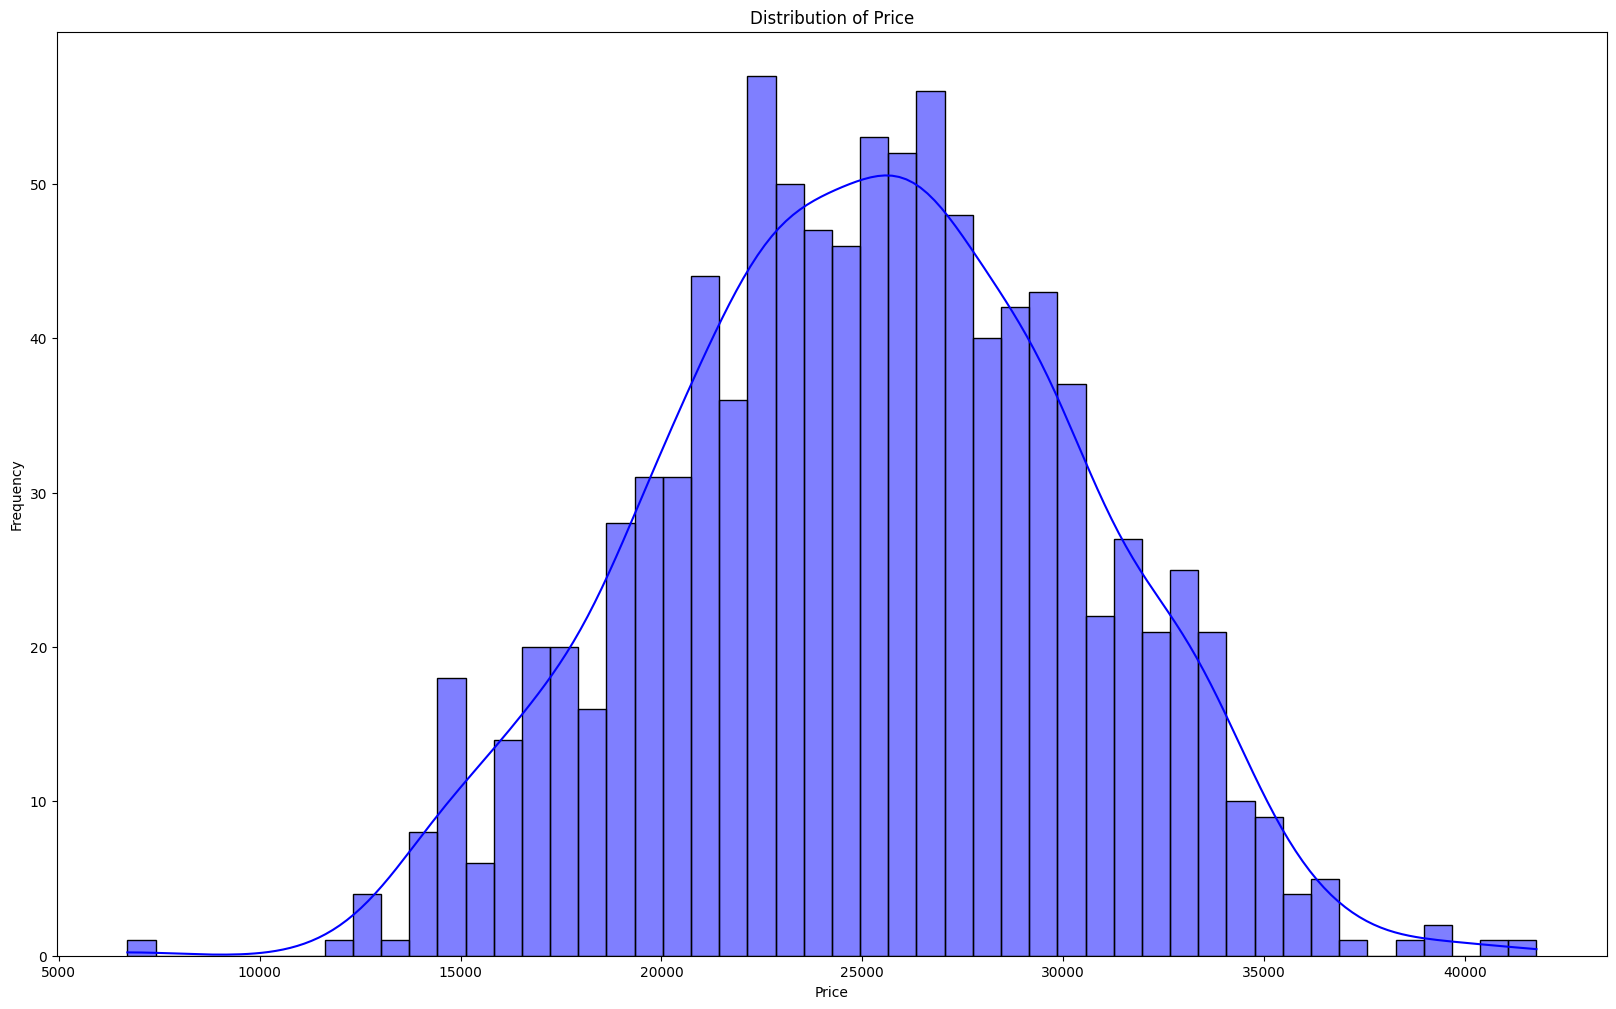

In [62]:
# Check distribution of the target variable
plt.figure(figsize=(20, 12))
sns.histplot(data['Price'], kde=True, color='blue', bins=50)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [63]:
correlation_matrix = data.corr(numeric_only=True)

In [64]:
correlation_matrix

,Year,Engine Size,Mileage,Price
Year,1.000000,-0.012190,0.016376,0.609631
Engine Size,-0.012190,1.000000,-0.014815,0.383951
Mileage,0.016376,-0.014815,1.000000,-0.556560
Price,0.609631,0.383951,-0.556560,1.000000


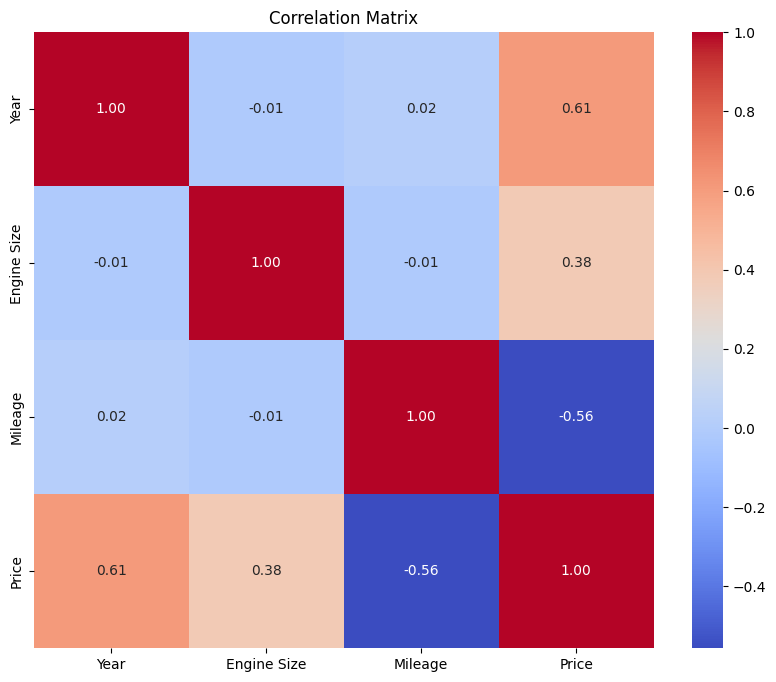

In [65]:
# Check correlations between numeric variables
correlation_matrix = data.corr(numeric_only=True)

# Visualize the correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [66]:
# One-hot encoding for categorical column
encoder = OneHotEncoder(sparse_output=False)
encoded_df = pd.DataFrame(encoder.fit_transform(data[['Make']]), columns=encoder.get_feature_names_out(['Make']))
numeric_data = data.select_dtypes(include=['float64', 'int64'])
all_data = pd.concat([numeric_data, encoded_df], axis=1)

In [67]:
# Now calculate correlations again
correlation_matrix = all_data.corr()

In [68]:
# Check Null Values
all_data.isnull().values.any()

np.False_

In [69]:
# Check for missing values
missing_values = all_data.isnull().sum()

In [70]:

missing_values

,0
Year,0
Engine Size,0
Mileage,0
Price,0
Make_Audi,0
Make_BMW,0
Make_Ford,0
Make_Honda,0
Make_Toyota,0


In [71]:
all_data.shape

(1000, 9)

In [72]:
len(all_data.columns)

9

In [73]:
all_data.describe()

,Year,Engine Size,Mileage,Price,Make_Audi,Make_BMW,Make_Ford,Make_Honda,Make_Toyota
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2010.688000,2.798300,97192.48700,25136.615530,0.212000,0.178000,0.225000,0.198000,0.187000
std,6.288577,1.024137,59447.31576,5181.401368,0.408929,0.382704,0.417791,0.398692,0.390107
min,2000.000000,1.000000,56.00000,6704.953524,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2005.000000,1.900000,44768.75000,21587.878370,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2011.000000,2.800000,94411.50000,25189.325247,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,3.700000,148977.75000,28806.368974,0.000000,0.000000,0.000000,0.000000,0.000000
max,2021.000000,4.500000,199867.00000,41780.504635,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
# Prepare the features (X) and target (y)
X = all_data.drop(columns=['Price'])
y = all_data['Price']

In [75]:
# Step 4: Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [76]:
# Step 5: Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [77]:
# Models Without Optimization


# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_lr = linear_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"MAE: {mae_lr}, MSE: {mse_lr}, RMSE: {rmse_lr}, MAPE: {mape_lr}, R²: {r2_lr}")

MAE: 1790.0861893197048, MSE: 4895047.051578211, RMSE: 2212.475322252931, MAPE: 0.07599511014259014, R²: 0.8211311663346552


In [78]:
# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"MAE: {mae_ridge}, MSE: {mse_ridge}, RMSE: {rmse_ridge}, MAPE: {mape_ridge}, R²: {r2_ridge}")

MAE: 1790.1578576865018, MSE: 4893694.915348721, RMSE: 2212.1697302306443, MAPE: 0.0760050980436189, R²: 0.821180574446115


In [79]:
# Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
mape_lasso = mean_absolute_percentage_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"MAE: {mae_lasso}, MSE: {mse_lasso}, RMSE: {rmse_lasso}, MAPE: {mape_lasso}, R²: {r2_lasso}")

MAE: 1790.0494182825412, MSE: 4894593.742407614, RMSE: 2212.372875988045, MAPE: 0.07599569960063907, R²: 0.8211477306049839


In [80]:
# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"MAE: {mae_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}, MAPE: {mape_rf}, R²: {r2_rf}")

MAE: 1904.1714810631245, MSE: 5482198.730072243, RMSE: 2341.4095605152556, MAPE: 0.08088585602945195, R²: 0.799676186472303


In [81]:
# Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"MAE: {mae_dt}, MSE: {mse_dt}, RMSE: {rmse_dt}, MAPE: {mape_dt}, R²: {r2_dt}")

MAE: 2575.230967890359, MSE: 10301667.21441852, RMSE: 3209.621039066531, MAPE: 0.10855075646342925, R²: 0.6235690525472121


In [82]:
# Models With Optimization (GridSearchCV)




# Linear Regression (fit_intercept)
param_grid_linear = {'fit_intercept': [True, False]}
grid_search_lr = GridSearchCV(LinearRegression(), param_grid_linear, cv=5, scoring='neg_mean_absolute_error')
grid_search_lr.fit(X_train, y_train)
y_pred_lr_opt = grid_search_lr.best_estimator_.predict(X_test)

mae_lr_opt = mean_absolute_error(y_test, y_pred_lr_opt)
mse_lr_opt = mean_squared_error(y_test, y_pred_lr_opt)
rmse_lr_opt = np.sqrt(mse_lr_opt)
mape_lr_opt = mean_absolute_percentage_error(y_test, y_pred_lr_opt)
r2_lr_opt = r2_score(y_test, y_pred_lr_opt)
print(f"MAE: {mae_lr_opt}, MSE: {mse_lr_opt}, RMSE: {rmse_lr_opt}, MAPE: {mape_lr_opt}, R²: {r2_lr_opt}")

MAE: 1790.0861893197048, MSE: 4895047.051578211, RMSE: 2212.475322252931, MAPE: 0.07599511014259014, R²: 0.8211311663346552


In [83]:
# Ridge Regression
param_grid_ridge = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_absolute_error')
grid_search_ridge.fit(X_train, y_train)
y_pred_ridge_opt = grid_search_ridge.best_estimator_.predict(X_test)

mae_ridge_opt = mean_absolute_error(y_test, y_pred_ridge_opt)
mse_ridge_opt = mean_squared_error(y_test, y_pred_ridge_opt)
rmse_ridge_opt = np.sqrt(mse_ridge_opt)
mape_ridge_opt = mean_absolute_percentage_error(y_test, y_pred_ridge_opt)
r2_ridge_opt = r2_score(y_test, y_pred_ridge_opt)
print(f"MAE: {mae_ridge_opt}, MSE: {mse_ridge_opt}, RMSE: {rmse_ridge_opt}, MAPE: {mape_ridge_opt}, R²: {r2_ridge_opt}")

MAE: 1791.9276041027433, MSE: 4885223.9140822245, RMSE: 2210.2542645773187, MAPE: 0.0761568310435332, R²: 0.8214901114333085


In [84]:
# Lasso Regression
param_grid_lasso = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_search_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='neg_mean_absolute_error')
grid_search_lasso.fit(X_train, y_train)
y_pred_lasso_opt = grid_search_lasso.best_estimator_.predict(X_test)

mae_lasso_opt = mean_absolute_error(y_test, y_pred_lasso_opt)
mse_lasso_opt = mean_squared_error(y_test, y_pred_lasso_opt)
rmse_lasso_opt = np.sqrt(mse_lasso_opt)
mape_lasso_opt = mean_absolute_percentage_error(y_test, y_pred_lasso_opt)
r2_lasso_opt = r2_score(y_test, y_pred_lasso_opt)
print(f"MAE: {mae_lasso_opt}, MSE: {mse_lasso_opt}, RMSE: {rmse_lasso_opt}, MAPE: {mape_lasso_opt}, R²: {r2_lasso_opt}")

MAE: 1795.8247214665184, MSE: 4883813.914688003, RMSE: 2209.935273868446, MAPE: 0.0764841968562888, R²: 0.8215416339098968


In [85]:
# Random Forest
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='neg_mean_absolute_error')
grid_search_rf.fit(X_train, y_train)
y_pred_rf_opt = grid_search_rf.best_estimator_.predict(X_test)

mae_rf_opt = mean_absolute_error(y_test, y_pred_rf_opt)
mse_rf_opt = mean_squared_error(y_test, y_pred_rf_opt)
rmse_rf_opt = np.sqrt(mse_rf_opt)
mape_rf_opt = mean_absolute_percentage_error(y_test, y_pred_rf_opt)
r2_rf_opt = r2_score(y_test, y_pred_rf_opt)
print(f"MAE: {mae_rf_opt}, MSE: {mse_rf_opt}, RMSE: {rmse_rf_opt}, MAPE: {mape_rf_opt}, R²: {r2_rf_opt}")

MAE: 1857.561226095787, MSE: 5294128.336828442, RMSE: 2300.897289499999, MAPE: 0.0792715117244481, R²: 0.8065484251927981


In [86]:
# Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='neg_mean_absolute_error')
grid_search_dt.fit(X_train, y_train)


best_dt_model = grid_search_dt.best_estimator_
y_pred_dt_opt = best_dt_model.predict(X_test)

mae_dt_opt = mean_absolute_error(y_test, y_pred_dt_opt)
mse_dt_opt = mean_squared_error(y_test, y_pred_dt_opt)
rmse_dt_opt = np.sqrt(mse_dt_opt)
mape_dt_opt = mean_absolute_percentage_error(y_test, y_pred_dt_opt)
r2_dt_opt = r2_score(y_test, y_pred_dt_opt)

print(f"MAE: {mae_dt_opt}, MSE: {mse_dt_opt}, RMSE: {rmse_dt_opt}, MAPE: {mape_dt_opt}, R²: {r2_dt_opt}")



MAE: 2080.6024873126858, MSE: 6730985.697521219, RMSE: 2594.4143264947525, MAPE: 0.08774640036910601, R²: 0.7540445375809884


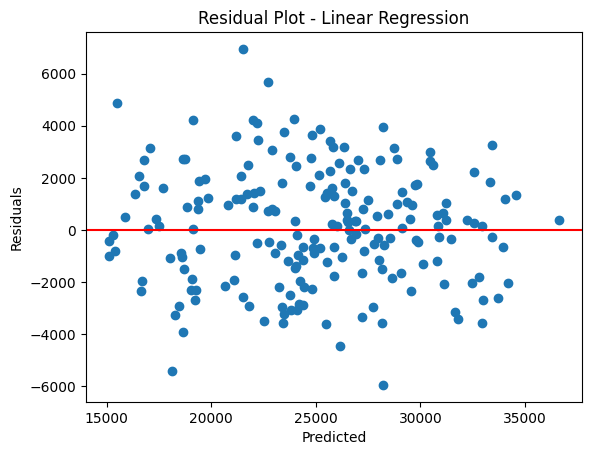

In [87]:
# Visualization

# Residual Plot (Linear Regression)
residuals = y_test - y_pred_lr
plt.scatter(y_pred_lr, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot - Linear Regression")
plt.show()

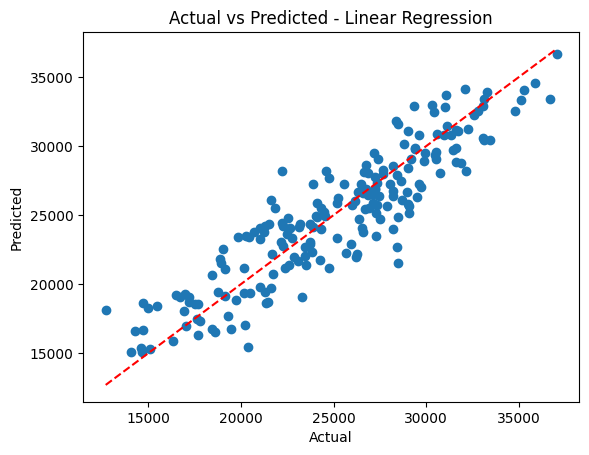

In [88]:
# Actual vs Predicted
plt.scatter(y_test, y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - Linear Regression")
plt.show()

In [89]:
#Model Comparison Table
def evaluate_model(y_test, y_pred):
    return [
        mean_absolute_error(y_test, y_pred),
        np.sqrt(mean_squared_error(y_test, y_pred)),
        r2_score(y_test, y_pred)
    ]

results = pd.DataFrame({
    'Model': [
        'Linear', 'Ridge', 'Lasso', 'Random Forest',
        'Optimized Linear', 'Optimized Ridge', 'Optimized Lasso', 'Optimized RF',
        'Decision Tree', 'Optimized Decision Tree'
    ],
    'MAE': [
        *evaluate_model(y_test, y_pred_lr)[0:1],
        *evaluate_model(y_test, y_pred_ridge)[0:1],
        *evaluate_model(y_test, y_pred_lasso)[0:1],
        *evaluate_model(y_test, y_pred_rf)[0:1],
        *evaluate_model(y_test, y_pred_lr_opt)[0:1],
        *evaluate_model(y_test, y_pred_ridge_opt)[0:1],
        *evaluate_model(y_test, y_pred_lasso_opt)[0:1],
        *evaluate_model(y_test, y_pred_rf_opt)[0:1],
        *evaluate_model(y_test, y_pred_dt)[0:1],
        *evaluate_model(y_test, y_pred_dt_opt)[0:1]
    ],
    'RMSE': [
        *evaluate_model(y_test, y_pred_lr)[1:2],
        *evaluate_model(y_test, y_pred_ridge)[1:2],
        *evaluate_model(y_test, y_pred_lasso)[1:2],
        *evaluate_model(y_test, y_pred_rf)[1:2],
        *evaluate_model(y_test, y_pred_lr_opt)[1:2],
        *evaluate_model(y_test, y_pred_ridge_opt)[1:2],
        *evaluate_model(y_test, y_pred_lasso_opt)[1:2],
        *evaluate_model(y_test, y_pred_rf_opt)[1:2],
        *evaluate_model(y_test, y_pred_dt)[1:2],
        *evaluate_model(y_test, y_pred_dt_opt)[1:2]
    ],
    'R2': [
        *evaluate_model(y_test, y_pred_lr)[2:],
        *evaluate_model(y_test, y_pred_ridge)[2:],
        *evaluate_model(y_test, y_pred_lasso)[2:],
        *evaluate_model(y_test, y_pred_rf)[2:],
        *evaluate_model(y_test, y_pred_lr_opt)[2:],
        *evaluate_model(y_test, y_pred_ridge_opt)[2:],
        *evaluate_model(y_test, y_pred_lasso_opt)[2:],
        *evaluate_model(y_test, y_pred_rf_opt)[2:],
        *evaluate_model(y_test, y_pred_dt)[2:],
        *evaluate_model(y_test, y_pred_dt_opt)[2:]
    ]
})

print("\nModel Comparison Table:")
print(results)


Model Comparison Table:
                     Model          MAE         RMSE        R2
0                   Linear  1790.086189  2212.475322  0.821131
1                    Ridge  1790.157858  2212.169730  0.821181
2                    Lasso  1790.049418  2212.372876  0.821148
3            Random Forest  1904.171481  2341.409561  0.799676
4         Optimized Linear  1790.086189  2212.475322  0.821131
5          Optimized Ridge  1791.927604  2210.254265  0.821490
6          Optimized Lasso  1795.824721  2209.935274  0.821542
7             Optimized RF  1857.561226  2300.897289  0.806548
8            Decision Tree  2575.230968  3209.621039  0.623569
9  Optimized Decision Tree  2080.602487  2594.414326  0.754045
